<a href="https://colab.research.google.com/github/pds2021/a5-crown90/blob/assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 20/21*
# Programming Assignment 5 - Create your own App

In this programming assignment you'll build a model that serves as a foundation for your own app. To this end, you will create your own dataset, build a deep learning model on this data, and deploy it!

In [1]:
# Import necessary packages
!pip install -Uqq fastai  # upgrade fastai on colab
from fastai.vision.all import *
from fastai.vision.widgets import *

     |████████████████████████████████| 194kB 10.1MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 


__Google Drive integration__

If you want to store and access your downloaded data for this assignment you can use the following code:

In [2]:
# Google Drive integration for some images
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/My\ Drive/pds_a5
%cd /content/drive/My\ Drive/pds_a5

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/pds_a5’: File exists
/content/drive/My Drive/pds_a5


In [10]:
# In case of errors, flush and unmount Google Drive
#drive.flush_and_unmount()

In [2]:
# Set root directory to avoid stupid confusing Google Colab error messages
# while working on temporary file system
import os
path = "/content"
os.chdir(path)

In [3]:
# Create and change working directory
os.makedirs("pds_a5", exist_ok=True)
os.chdir("pds_a5")

## Develop an Application Idea

___Free your mind - this part is totally up to you.___

Think of an app that you'd like to build.
*   What useful app have you been missing?
*   Do you have any hobbies an app could be helpful for?
*   Is this a suitable classification or regression task? 
*   How could you get the data?


In [3]:
# I am a big fan of "The Big Bang Theory". This series motivated me to create 
# the game "Rock Paper Scissors Lizard Spock" which is an extension of the 
# classig game of chance, Rock Paper Scissors. 
#
# Gameplan:
# 01. The player adjusts an [Rock/Paper/Scissors/Lizard/Spock] by hand
# 02. The AI player chooses one too and presents its choice to the player
# 03. The winner will be promoted
# 04. End of game 
#
# Game Rules:
# 01. scissors cuts paper
# 02. paper covers rock
# 03. rock crushes lizard
# 04. lizard poisons Spock
# 05. spock smashes scissors
# 06. scissors decapitates lizard
# 07. lizard eats paper
# 08. paper disproves Spock
# 09. spock vaporizes rock
# 10. rock crushes scissors.

You can get an inspiration from these Apps:

<table>
<tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/5.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/400">Guitar Classifier</a> by Christian Werner</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/6.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/340">Healthy or Not!</a> by Nikhil Utane </td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/7.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/333">Hummingbird Classifier</a> by Nissan Dookeran</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/8.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/409">Edible Mushroom?</a> by Ramon</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/9.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/387">Cousin Recognizer</a> by Charlie Harrington</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/10.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/386">Emotion Classifier</a> by Ethan Sutin and Team 26</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/11.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/350">American Sign Language</a> by Keyur Paralkar</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/12.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/355">Your City from Space</a> by Henri Palacci</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/13.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/367">Univariate TS as images using Gramian Angular Field</a> by Ignacio Oguiza</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/14.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/348">Face Expression Recognition</a> by Pierre Guillou</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/15.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/352">Tumor-normal sequencing</a> by Alena Harley</td><td>  </td>
</tr><table>

## Creating your own Dataset

Now you need to construct a dataset that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

Here, you can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   Of course, you can use your own data/images :) 

### 1. Dowload the data 
- You may use the helper functions from the lecture to get the image URLs
- Create a new folder at your defined `path`
- Use `download_image` to download the images into the corresponding (sub-)directories

In [ ]:
# To create the game we need datasets containing images of hands adjusting:
# 1. Rock, Paper, Scissors
# 2. Lizard, Spock
#
# While datasets of (1) are available as part of some classic "rock paper scissors" 
# applications on kaggle.com datasets for (2) could not be found. The latter
# have need to be gathered through Image Search. 

In [4]:
# To access datasets (1) we need to create 'kaggle.json' file first to allow 
# Google Colab access kaggle.com via API
import json
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

# Create file and store secret
with open('/root/.kaggle/kaggle.json', 'w') as file:
    api_token = {"username":"crown90","key":"c106dfa6e1e255edae4dbbc0251c2152"}
    json.dump(api_token, file)

# As I can remember the old days at work: owner rights (read 400, write 200),
# group rights (read 00, write 00), other rights (read 0, write 0)
# sum up to chmod 600 (400+200+00+00+0+0)
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Now we can download and unzip one datasets from (1):
#!kaggle datasets download -d sanikamal/rock-paper-scissors-dataset --force
#!unzip rock-paper-scissors-dataset.zip

In [5]:
# Now we can download and unzip datasets (1) and cleanup afterwards:
!kaggle datasets download -d drgfreeman/rockpaperscissors --force
!unzip rockpaperscissors.zip

 94% 286M/306M [00:01<00:00, 235MB/s]
100% 306M/306M [00:01<00:00, 203MB/s]
Archive:  rockpaperscissors.zip
  inflating: README_rpc-cv-images.txt  
  inflating: paper/04l5I8TqdzF9WDMJ.png  
  inflating: paper/0Og76sl5CJhbxWWx.png  
  inflating: paper/0RA9rcrv8iVvuDDU.png  
  inflating: paper/0Uomd0HvOB33m47I.png  
  inflating: paper/0a3UtNzl5Ll3sq8K.png  
  inflating: paper/0cb6cVL8pkfi4wF6.png  
  inflating: paper/0eqArS2GgsBeqgSn.png  
  inflating: paper/0t08v9bAaA0mXGCQ.png  
  inflating: paper/0vugygEjxQJPr9yz.png  
  inflating: paper/0zKU6wEhT2cDe9j0.png  
  inflating: paper/14K62H4KG1hg5qiJ.png  
  inflating: paper/1Dfw5FRlS4h60JPX.png  
  inflating: paper/1Frbe8cdOdkciOBg.png  
  inflating: paper/1Tt9U9SzrOm98Xtw.png  
  inflating: paper/1fKclJk4eBWOQSR1.png  
  inflating: paper/1jHtb93pI8f6pfKo.png  
  inflating: paper/1oKnUgV2CdCaQUUX.png  
  inflating: paper/1uoW7QcH2qAgCTxv.png  
  inflating: paper/1yKjzquSvl9ShK7K.png  
  inflating: paper/1yeoLbmp4alVOtFv.png  
  inflating:

In [6]:
# Cleanup (remove files and unused directories)
import shutil
shutil.rmtree("rps-cv-images", ignore_errors=True)
os.remove("rockpaperscissors.zip")
os.remove("README_rpc-cv-images.txt")

In [7]:
# In the next step we need to search and dowload datasets for (2). 
# Since we cannot simply download these kind of datasets, we use the following 
# code snippet to search and download images from duckduckgo

import requests
import re
import json
from fastcore.foundation import L

def search_images_ddg(key,max_n=150):
    """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
    (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api and 
    https://github.com/fastai/fastbook/blob/master/utils.py)
    """
    url        = 'https://duckduckgo.com/'
    params     = {'q':key}
    res        = requests.post(url,data=params)
    searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
    if not searchObj: print('Token Parsing Failed !'); return
    requestUrl = url + 'i.js'
    headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0',
                 'referer': 'https://duckduckgo.com/'}
    params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
    urls       = []
    while True:
        try:
            res  = requests.get(requestUrl,headers=headers,params=params)
            data = json.loads(res.text)
            for obj in data['results']:
                urls.append(obj['image'])
                max_n = max_n - 1
                if max_n < 1: return L(set(urls))     # dedupe
            if 'next' not in data: return L(set(urls))
            requestUrl = url + data['next']
        except:
            pass

In [8]:
# Search and download images for spock
os.makedirs("spock", exist_ok=True)
results = search_images_ddg('spock hand')
download_images("spock", urls=results)

In [9]:
# Search and download images for lizard
os.makedirs("lizard", exist_ok=True)
results = search_images_ddg('rock handzeichen')
download_images("lizard", urls=results)

### 2. Verify Images
- First, create a list of all your images
- Use `verify_images` and `unlink` to remove broken images

In [10]:
# Get a list of all images available in the working directory
current_working_dir = os.getcwd()
images = get_image_files(current_working_dir)
images

(#2424) [Path('/content/pds_a5/rock/Hz5ynYPew6XqaLdO.png'),Path('/content/pds_a5/rock/2uxDLQKemRqulhIx.png'),Path('/content/pds_a5/rock/yLeWjzIsAgQO8rT2.png'),Path('/content/pds_a5/rock/TI2gNkqMM5nOpoB0.png'),Path('/content/pds_a5/rock/JMkBm2iBy4VxFChU.png'),Path('/content/pds_a5/rock/wweMJiVO1CgNIGHW.png'),Path('/content/pds_a5/rock/gtVEm7JEdr0wE1ip.png'),Path('/content/pds_a5/rock/2EAkMCm7ZLnNoBQ7.png'),Path('/content/pds_a5/rock/JspEtoXj1u5CjLmG.png'),Path('/content/pds_a5/rock/g9lqYZfHWUb3cm08.png')...]

In [11]:
# Verify images and show corrupted ones
corrupted_images = verify_images(images)
corrupted_images

(#2) [Path('/content/pds_a5/spock/00000074.jpg'),Path('/content/pds_a5/spock/00000040.jpg')]

In [12]:
# Unlink corrupted images
corrupted_images.map(Path.unlink)
corrupted_images

(#2) [Path('/content/pds_a5/spock/00000074.jpg'),Path('/content/pds_a5/spock/00000040.jpg')]

### 3. Create the DataBlock
For this, you need to think of:
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

Use `RandomResizedCrop` for `item_tfms`with an image size of 224 px, and the appropriate `aug_transforms` as `batch_tfms`.

In [28]:
# In this step we create a DataBlock object and configure the pipe
datablock_hands = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224),
    batch_tfms=aug_transforms())

### 4. Create the DataLoaders

In [29]:
# Now its time to load images with our DataBlock
dls = datablock_hands.dataloaders(current_working_dir)

### 5. Take a look at some of your pictures. 
Does everything look as expected?

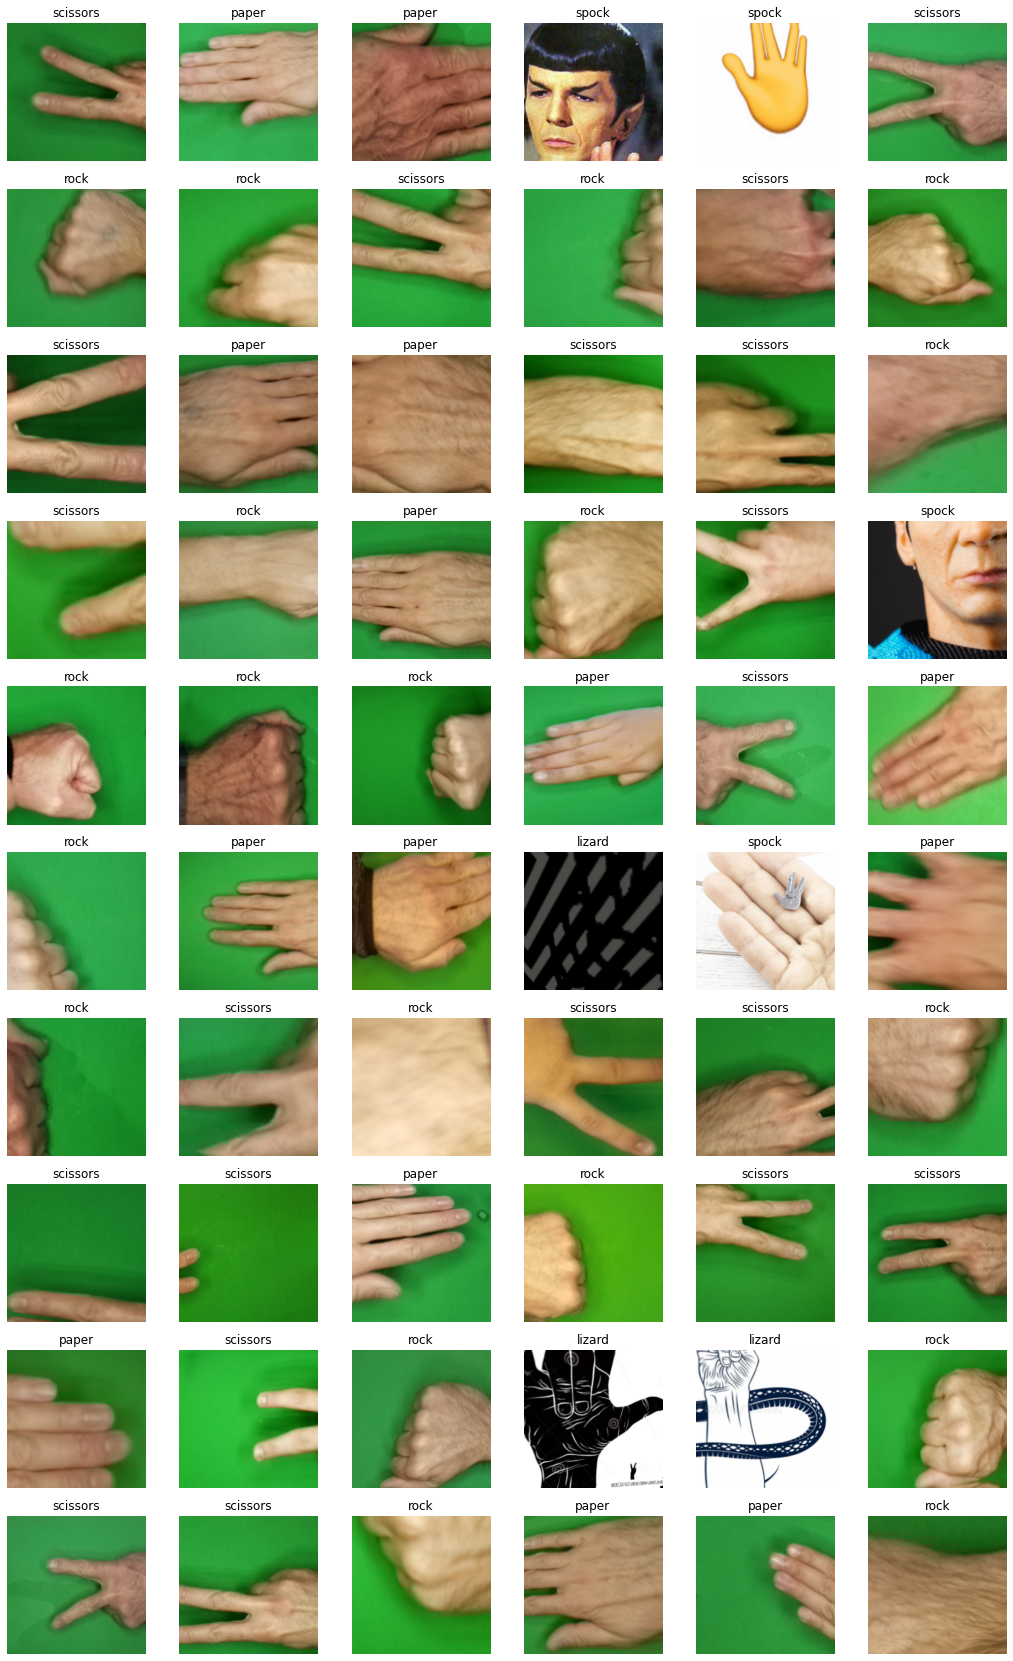

In [30]:
# Take a look around...
dls.train.show_batch(max_n=60, nrows=10)

## Modeling

### 6. Create a learner

Create an appropriate learner for your data
- Choose an appropriate model [architecture](https://fastai1.fast.ai/vision.models.html)
- Choose appropriate [metrics](https://docs.fast.ai/metrics.html) for your task

In [31]:
# Create a learner for the data. We use resnet18 architecture
# and error_rate as metrics
learn = cnn_learner(dls, resnet18, metrics=error_rate)

### 7. Fit the model

Use your knowdledge on model training to fit your model!

In [32]:
# Start the progress of fitting the model
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.318679,0.216459,0.083333,00:13


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.481838,0.119210,0.037500,00:14
1,0.376741,0.054970,0.016667,00:13
2,0.310277,0.058750,0.018750,00:13
3,0.284322,0.050550,0.016667,00:14


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

### 8. Evaluate the model

You' ve already seen many ways to evaluate a model. Evaluate your model in a qualitative and quantitative manner.

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


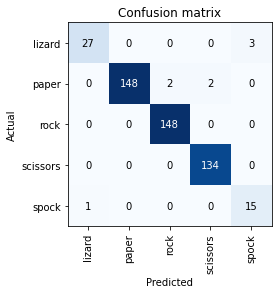

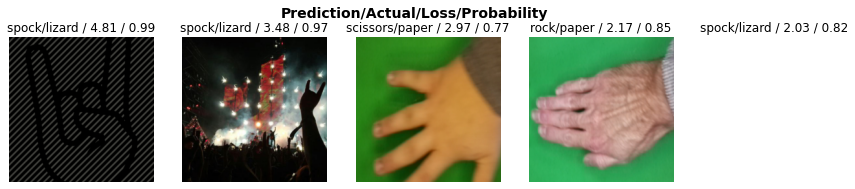

In [33]:
# Show images with are confusing for our model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

### 9. Clean your data

Based on the evaluation, you may want to clean your data using the `ImageClassifierCleaner`.
- Remeber to delete the selected data after using the cleaner:
    ```python
    for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    ```
    
    
- Once we've cleaned up our data, we can retrain our model. 



In [34]:
from fastai.vision.widgets import *

In [35]:
# Based on our evaluation earlier we clean the data; removing images
cleaner = ImageClassifierCleaner(learn)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [36]:
cleaner

In [24]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

Now, take your app into production. You can follow the steps from the lecure:

- Export your model via `learn.export`
- Upload your model to [Github Releases](https://docs.github.com/en/free-pro-team@latest/github/administering-a-repository/about-releases) to make it publicly available at your repository.
- Create and upload a new notebook that only contains the necassary code and IPython widgets for your App. 
    - Remeber to download the exported model from *Github Releases*
    - Include a brief description of your app and the functionalities
- Publish your web app on [Binder](https://mybinder.org/) using Voilà

You can use the [example](https://github.com/pds2021/course/blob/main/nbs/07_Bear_App.ipynb) from the lecture as an orientation.

If you're familiar with the world of web application development, you're free to use these skills and all your tools and ressources!

In [37]:
# The hard part is done. Now we export our model to use it in our application
learn.export()

## Finally, Provide a Link to Your App

In [ ]:
# Provide the link to your web app

if ()